# Generate distance-dependent motion-related artifact plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nibabel as nib
import pandas as pd
import nimare
import statsmodels.api as sm
from nilearn import input_data, datasets
from scipy import stats
from scipy.spatial.distance import pdist, squareform

import generate_plots as gp

sns.set_style('whitegrid')

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
n_subjects = 31
fd_thresh = 0.05
window = 1000
v1, v2 = 35, 100
data = datasets.fetch_adhd(n_subjects=n_subjects)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/nilearn/datasets/func.py:501: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [3]:
def get_fd(motion):
    # assuming rotations in degrees
    motion[:, :3] = motion[:, :3] * (np.pi/180.) * 50
    motion = np.vstack((np.array([[0, 0, 0, 0, 0, 0]]),
                        np.diff(motion, axis=0)))
    fd = np.sum(np.abs(motion), axis=1)
    return fd

## Prepare data

In [4]:
imgs = []
fd_all = []

for i in range(n_subjects):
    func = data.func[i]
    imgs.append(nib.load(func))
    conf = data.confounds[i]    
    df = pd.read_csv(conf, sep='\t')
    motion = df[['motion-pitch', 'motion-roll', 'motion-yaw',
                 'motion-x', 'motion-y', 'motion-z']].values
    fd_all.append(get_fd(motion))

## Run analysis

In [5]:
results = gp.run(imgs, fd_all, n_iters=10000, fd_thresh=0.05)
idx1 = np.abs(results['sorted_dists']-v1).argmin()
idx2 = np.abs(results['sorted_dists']-v2).argmin()

## Generate plot

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


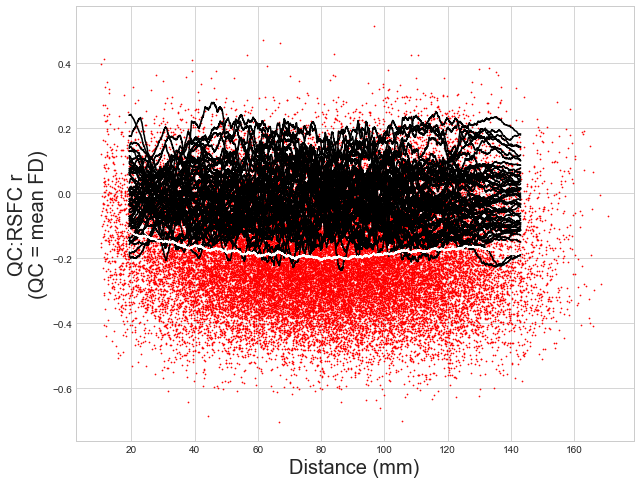

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(results['sorted_dists'], results['qcrsfc_y'],
            ax=ax, scatter=True, fit_reg=False,
            line_kws={'color': 'black', 'linewidth': 3},
            scatter_kws={'color': 'red', 's': 0.5, 'alpha': 1})
for i in range(50):
    ax.plot(results['sorted_dists'], results['qcrsfc_null'][i, :],
            color='black')
ax.plot(results['sorted_dists'], results['qcrsfc_smc'],
        color='white')
ax.set_xlabel('Distance (mm)', fontsize=20)
ax.set_ylabel('QC:RSFC r\n(QC = mean FD)', fontsize=20)
fig.show()

In [7]:
intercept = results['qcrsfc_smc'][idx1]
slope = results['qcrsfc_smc'][idx2] - results['qcrsfc_smc'][idx1]
perm_intercepts = results['qcrsfc_null'][:, idx1]
perm_slopes = results['qcrsfc_null'][:, idx2] - results['qcrsfc_null'][:, idx1]
p_inter = nimare.utils.null_to_p(intercept, perm_intercepts)
p_slope = nimare.utils.null_to_p(slope, perm_slopes)
print('Intercept = {0:.04f}, p = {1:.04f}'.format(intercept, p_inter))
print('Slope = {0:.04f}, p = {1:.04f}'.format(slope, p_slope))

Intercept = -0.1584, p = 0.0606
Slope = -0.0277, p = 0.7104


/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


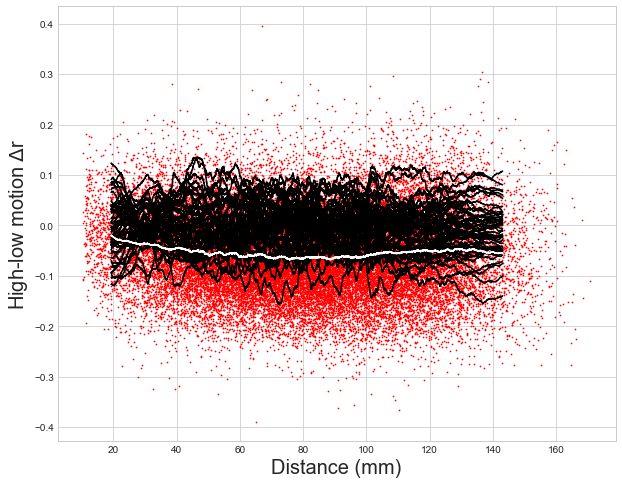

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(results['sorted_dists'], results['hl_y'],
            ax=ax, scatter=True, fit_reg=False,
            line_kws={'color': 'black', 'linewidth': 3},
            scatter_kws={'color': 'red', 's': 0.5, 'alpha': 1})
for i in range(50):
    ax.plot(results['sorted_dists'], results['hl_null'][i, :],
            color='black')
ax.plot(results['sorted_dists'], results['hl_smc'],
        color='white')
ax.set_xlabel('Distance (mm)', fontsize=20)
ax.set_ylabel(r'High-low motion $\Delta$r', fontsize=20)
fig.show()

In [9]:
intercept = results['hl_smc'][idx1]
slope = results['hl_smc'][idx2] - results['hl_smc'][idx1]
perm_intercepts = results['hl_null'][:, idx1]
perm_slopes = results['hl_null'][:, idx2] - results['hl_null'][:, idx1]
p_inter = nimare.utils.null_to_p(intercept, perm_intercepts)
p_slope = nimare.utils.null_to_p(slope, perm_slopes)
print('Intercept = {0:.04f}, p = {1:.04f}'.format(intercept, p_inter))
print('Slope = {0:.04f}, p = {1:.04f}'.format(slope, p_slope))

Intercept = -0.0430, p = 0.3458
Slope = -0.0175, p = 0.5888


/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


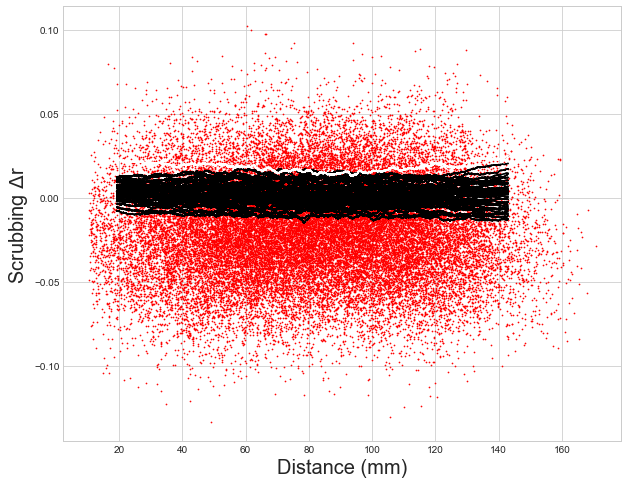

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(results['sorted_dists'], results['scrub_y'],
            ax=ax, scatter=True, fit_reg=False,
            line_kws={'color': 'black', 'linewidth': 3},
            scatter_kws={'color': 'red', 's': 0.5, 'alpha': 1})
for i in range(50):
    ax.plot(results['sorted_dists'], results['scrub_null'][i, :],
            color='black')
ax.plot(results['sorted_dists'], results['scrub_smc'],
        color='white')
ax.set_xlabel('Distance (mm)', fontsize=20)
ax.set_ylabel(r'Scrubbing $\Delta$r', fontsize=20)
fig.show()

In [11]:
intercept = results['scrub_smc'][idx1]
slope = results['scrub_smc'][idx2] - results['scrub_smc'][idx1]
perm_intercepts = results['scrub_null'][:, idx1]
perm_slopes = results['scrub_null'][:, idx2] - results['scrub_null'][:, idx1]
p_inter = nimare.utils.null_to_p(intercept, perm_intercepts)
p_slope = nimare.utils.null_to_p(slope, perm_slopes)
print('Intercept = {0:.04f}, p = {1:.04f}'.format(intercept, p_inter))
print('Slope = {0:.04f}, p = {1:.04f}'.format(slope, p_slope))

Intercept = 0.0199, p = 0.0064
Slope = -0.0041, p = 0.1660
